In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
!pip install tensorflow==2.4.3

In [ ]:
!pip install scikeras

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.8.2
    Uninstalling importlib-metadata-4.8.2:
      Successfully uninstalled importlib-metadata-4.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


In [ ]:
import tensorflow
tensorflow.__version__

'2.4.3'

In [ ]:
import pandas as pd
import numpy as np
import json

import librosa
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

import matplotlib.pyplot as plt

In [ ]:
data_path = '/content/gdrive/MyDrive/COVID_cough/mfcc15_data_audiomentations.json'
test_data_path = '/content/gdrive/MyDrive/mfcc15_blind_set.json'
test_metadata_path = '/content/gdrive/MyDrive/COVID_cough/test_metadata.csv'

In [ ]:
with open(data_path, "r") as fp:
    data = json.load(fp)
        

In [ ]:
X = np.array(data["mfcc"])
y = np.array(data["label"])

In [ ]:
print(X.shape)
print(y.shape)

(1280, 302, 15)
(1280,)


In [ ]:
X=X.reshape(X.shape[0],-1,15,1)

In [ ]:
print(X.shape)
print(y.shape)

(1280, 302, 15, 1)
(1280,)


In [ ]:
# https://www.kite.com/python/answers/how-to-serialize-a-numpy-array-into-json-in-python
X[0].tolist()

In [ ]:
def create_model():
    model=Sequential()

    model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(302,15,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=32,kernel_size=(2,2),activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())

    model.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=3e-4, l2=3e-3),bias_regularizer=regularizers.l2(3e-3),activity_regularizer=regularizers.l2(3e-4)))
    model.add(Dropout(0.5))
    model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-2),bias_regularizer=regularizers.l2(1e-2),activity_regularizer=regularizers.l2(1e-3)))
    model.add(Dropout(0.3))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# model_cv = KerasClassifier(build_fn=create_model, epochs=200, batch_size=32)
# model_cv_200 = KerasClassifier(build_fn=create_model, epochs=200, batch_size=32)
model_cv_20 = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
# scores_200 = cross_val_score(model_cv_200, X, y, cv= kfold, n_jobs=-1)
scores_20 = cross_val_score(model_cv_20, X, y, cv= kfold, n_jobs=-1)
# scores_200, 
scores_20

array([0.8828125 , 0.8984375 , 0.92578125, 0.92578125, 0.87890625])

In [ ]:
# model_200 = create_model()
# model_200.fit(X, y, epochs=200, batch_size=32)
model_200 = load_model('/content/gdrive/MyDrive/cough-correct-model.h5')

In [ ]:
model_20 = create_model()
model_20.fit(X, y, epochs=20, batch_size=32)

Epoch 1/20
40/40 [==============================] - 4s 19ms/step - loss: 19.5791 - accuracy: 0.7102
Epoch 2/20
40/40 [==============================] - 1s 18ms/step - loss: 17.2598 - accuracy: 0.7820
Epoch 3/20
40/40 [==============================] - 1s 18ms/step - loss: 15.0280 - accuracy: 0.8180
Epoch 4/20
40/40 [==============================] - 1s 18ms/step - loss: 12.9902 - accuracy: 0.8727
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 11.2393 - accuracy: 0.9117
Epoch 6/20
40/40 [==============================] - 1s 18ms/step - loss: 9.7731 - accuracy: 0.9414
Epoch 7/20
40/40 [==============================] - 1s 18ms/step - loss: 8.5199 - accuracy: 0.9531
Epoch 8/20
40/40 [==============================] - 1s 18ms/step - loss: 7.4788 - accuracy: 0.9750
Epoch 9/20
40/40 [==============================] - 1s 18ms/step - loss: 6.6042 - accuracy: 0.9844
Epoch 10/20
40/40 [==============================] - 1s 18ms/step - loss: 5.8449 - accuracy: 0.9812
Epoc

In [ ]:
fold_dict={}
fold_dict['y_test']=y[test]

In [ ]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

pred_folds_list=[]

cvscores = []
for train, test in kfold.split(X, y):
    modell=Sequential()

    modell.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(302,15,1),activation='relu'))
    modell.add(MaxPooling2D(pool_size=(2,2)))
    modell.add(Conv2D(filters=32,kernel_size=(2,2),activation='relu'))
    modell.add(BatchNormalization())
    modell.add(Flatten())

    modell.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=3e-4, l2=3e-3),bias_regularizer=regularizers.l2(3e-3),activity_regularizer=regularizers.l2(3e-4)))
    modell.add(Dropout(0.5))
    modell.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-2),bias_regularizer=regularizers.l2(1e-2),activity_regularizer=regularizers.l2(1e-3)))
    modell.add(Dropout(0.3))
    modell.add(Dense(1,activation='sigmoid'))

    modell.compile(optimizer=optimiser,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    fold_dict=dict()
    modell.fit(X[train], y[train], epochs=200, batch_size=32, verbose=0)
    # evaluate the model
    scores = modell.evaluate( X[test], y[test], verbose=0)
    fold_dict['y_test']=y[test]
    fold_dict['y_pred']=modell.predict(X[test])
    pred_folds_list.append(fold_dict)
    
    print("%s: %.2f%%" % (modell.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
 


accuracy: 87.50%
accuracy: 89.84%
accuracy: 91.02%
accuracy: 90.23%
accuracy: 91.41%


In [ ]:

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

92.66% (+/- 4.22%)


 history = model.fit(X, y, batch_size=32, epochs=150)

# blind 

In [ ]:
with open(test_data_path, "r") as fp:
    test_data = json.load(fp)
test_data.keys()

dict_keys(['mfcc'])

In [ ]:
X_blind = np.array(test_data["mfcc"])
X_blind =X_blind.reshape(X_blind.shape[0],-1,15,1)
print(X_blind.shape)


(233, 302, 15, 1)


In [ ]:
y_blind=model_200.predict(X_blind)
# y_blind=model_20.predict(X_blind)
y_blind=list(y_blind.reshape(-1))
y_blind

In [ ]:
df=pd.read_csv(test_metadata_path)
df

In [ ]:
dicto={'File_name':list(df['File_name']),'Probability':y_blind}
results=pd.DataFrame(dicto)
results.to_csv( '/content/gdrive/MyDrive/Blind_Set_results_200.csv',index=False, header=False)
# results.to_csv( '/content/gdrive/MyDrive/Blind_Set_results_20.csv',index=False, header=False)

In [ ]:
model_20.save('/content/gdrive/MyDrive/cough-correct-model_20.h5')
# model_200.save('/content/gdrive/MyDrive/cough-correct-model.h5')

# !tar -zcvf cough-it-model.tgz cough-it-model.h5

In [ ]:
!cp ./gdrive/MyDrive/COVID_cough/models/cough-it-model.h5 ./cough-it-model.h5 

In [ ]:
from keras.models import load_model

model=load_model('/content/gdrive/MyDrive/COVID_cough/models/FULLcnn_mfcc15audiomentations.h5')

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

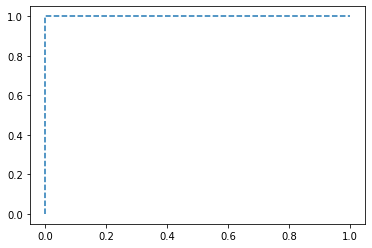

In [ ]:
sum_tests=0
sum_preds=0

for idx,item in enumerate(pred_folds_list):
  sum_tests+=item['y_test']
  sum_preds+=item['y_pred']

avg_tests=sum_tests/len(pred_folds_list)
avg_preds=sum_preds/len(pred_folds_list)

fpr, tpr, thresholds = roc_curve(avg_tests, avg_preds)
plt.plot(fpr, tpr, linestyle='--')

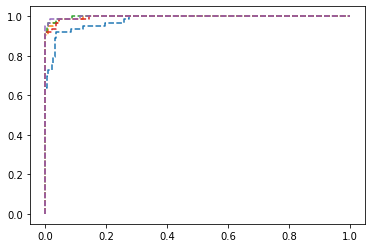

In [ ]:
fpr_list=[]
tpr_list=[]

for idx,item in enumerate(pred_folds_list):
  
  fpr, tpr, thresholds = roc_curve(item['y_test'], item['y_pred'])
  fpr_list.append(fpr)
  tpr_list.append(tpr)

  plt.plot(fpr, tpr, linestyle='--')



  

plt.show()

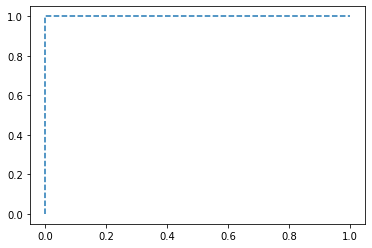

In [ ]:
plt.plot(fpr, tpr, linestyle='--')

In [ ]:


auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 1.000


In [ ]:
#model.save('cnn_auc888.h5',save_format='h5')

In [ ]:
#Lmodel=load_model('cnn_auc888.h5')

In [ ]:
y_test

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
y_preds=[]

for i in y_pred:
  if i >=0.4:
    y_preds.append(1)
  else:
    y_preds.append(0)

y_preds=np.array(y_preds)

In [ ]:
y_preds

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
confusion_matrix(y_test, y_preds)

array([[184,   9],
       [ 12,  51]])

In [ ]:
model.save('/content/gdrive/MyDrive/COVID_cough/models/mfcc15audiomentations.h5',save_format='h5')

Blind set eval

In [ ]:
import pandas as pd

In [ ]:
from keras.models import load_model

model=load_model(r'/content/gdrive/MyDrive/COVID_cough/models/mfcc15audiomentations.h5')

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/COVID_cough/test_metadata.csv')

In [ ]:
df

,File_name,Covid_status,Gender,Nationality
0,ehmkjtFk_cough,?,m,O
1,UCxrHdoP_cough,?,m,I
2,afJveyWf_cough,?,f,I
3,ckgXCsSh_cough,?,m,I
4,KprOlhNx_cough,?,m,I
...,...,...,...,...
228,WxtUSymX_cough,?,f,I
229,VYFvgWMm_cough,?,f,I
230,coWKLPUF_cough,?,f,I
231,XvOqdxQJ_cough,?,m,I


In [ ]:
data_path = '/content/gdrive/MyDrive/COVID_cough/data/Evaluations/mfcc15_blind_set.json'

In [ ]:
with open(data_path, "r") as fp:
        data = json.load(fp)
        

In [ ]:
X = np.array(data["mfcc"])
X=X.reshape(X.shape[0],-1,15,1)
X.shape

(233, 302, 15, 1)

In [ ]:
y_pred_probs=model.predict(X)

In [ ]:
y=list(y_pred_probs.reshape(-1))

In [ ]:
dicto={'File_name':list(df['File_name']),'Probability':y}

In [ ]:
results=pd.DataFrame(dicto)

In [ ]:
results.to_csv('15mfcc_audiomentation_Blind_Set_results.csv',index=False)

In [ ]:
x=pd.read_csv('15mfcc_audiomentation_Blind_Set_results.csv')

In [ ]:
type(x['Probability'][0])

numpy.float64

Val Folds eval

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/COVID_cough/Val_set.csv')

In [ ]:
df

,file_name
0,PQFgfbUS_cough
1,dpITIaDY_cough
2,IzXaepIB_cough
3,ZVKSsFiW_cough
4,LFqjhpiv_cough
...,...
1085,tWjZnGra_cough
1086,dAlFPhsp_cough
1087,gjLXOetR_cough
1088,WJAIhgpc_cough


In [ ]:
data_path = '/content/gdrive/MyDrive/COVID_cough/data/Evaluations/mfcc15_val_folds.json'

In [ ]:
with open(data_path, "r") as fp:
        data = json.load(fp)
        

In [ ]:
X = np.array(data["mfcc"])
X=X.reshape(X.shape[0],-1,15,1)
X.shape

(1090, 302, 15, 1)

In [ ]:
y_pred_probs=model.predict(X)

In [ ]:
y=list(y_pred_probs.reshape(-1))

In [ ]:
dicto={'File_name':list(df['file_name']),'Probability':y}

In [ ]:
results=pd.DataFrame(dicto)

In [ ]:
results.to_csv('15mfcc_audiomentations_val_set_results.csv',index=False)

In [ ]:
x=pd.read_csv('15mfcc_audiomentations_val_set_results.csv')

In [ ]:
type(x['Probability'][0])

numpy.float64